In [219]:
import pandas as pd
import sqlite3
import sqlalchemy 
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
try:
    conn = sqlite3.connect("mta_data.db")    
except Error as e:
    print(e)

#Now in order to read in pandas dataframe we need to know table name
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"mta_data: {cursor.fetchall()}")

df = pd.read_sql_query('SELECT * FROM mta_data', conn)
conn.close()

mta_data: [('mta_data',)]


In [221]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/17/2021,00:00:00,REGULAR,7557815,2581231
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/17/2021,04:00:00,REGULAR,7557822,2581234
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/17/2021,08:00:00,REGULAR,7557829,2581248
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/17/2021,12:00:00,REGULAR,7557891,2581318
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/17/2021,16:00:00,REGULAR,7558017,2581365


In [222]:
#df.describe
df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [223]:
df[:100]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/17/2021,00:00:00,REGULAR,7557815,2581231
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/17/2021,04:00:00,REGULAR,7557822,2581234
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/17/2021,08:00:00,REGULAR,7557829,2581248
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/17/2021,12:00:00,REGULAR,7557891,2581318
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/17/2021,16:00:00,REGULAR,7558017,2581365
...,...,...,...,...,...,...,...,...,...,...,...
95,A002,R051,02-03-00,59 ST,NQR456W,BMT,04/18/2021,20:00:00,REGULAR,1424849,5380685
96,A002,R051,02-03-00,59 ST,NQR456W,BMT,04/19/2021,00:00:00,REGULAR,1424871,5380732
97,A002,R051,02-03-00,59 ST,NQR456W,BMT,04/19/2021,04:00:00,REGULAR,1424873,5380734
98,A002,R051,02-03-00,59 ST,NQR456W,BMT,04/19/2021,08:00:00,REGULAR,1424877,5380894


In [224]:
#duplicate for version control
dft=df

In [225]:
#Combine date and time
dft["DATE_TIME"] = pd.to_datetime(dft['DATE'] + " " + dft['TIME'], format="%m/%d/%Y %H:%M:%S")

In [226]:
#Treat date 
dft['DATE'] = pd.to_datetime(dft['DATE'])
#type(df['DATE'])
dft['DATE'].value_counts().sort_index()

2019-02-02    28597
2019-02-03    28676
2019-02-04    28884
2019-02-05    29681
2019-02-06    28789
              ...  
2021-04-19    29910
2021-04-20    29816
2021-04-21    29821
2021-04-22    29926
2021-04-23    29945
Name: DATE, Length: 203, dtype: int64

In [227]:
#Treat date - YEAR
import datetime
dft['YEAR'] =pd.to_datetime(dft['DATE']).dt.year
dft

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-17,00:00:00,REGULAR,7557815,2581231,2021-04-17 00:00:00,2021
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-17,04:00:00,REGULAR,7557822,2581234,2021-04-17 04:00:00,2021
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-17,08:00:00,REGULAR,7557829,2581248,2021-04-17 08:00:00,2021
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-17,12:00:00,REGULAR,7557891,2581318,2021-04-17 12:00:00,2021
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-17,16:00:00,REGULAR,7558017,2581365,2021-04-17 16:00:00,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-02-08,04:00:00,REGULAR,5554,369,2019-02-08 04:00:00,2019
5978684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-02-08,08:00:00,REGULAR,5554,369,2019-02-08 08:00:00,2019
5978685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-02-08,12:00:00,REGULAR,5554,369,2019-02-08 12:00:00,2019
5978686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-02-08,16:00:00,REGULAR,5554,369,2019-02-08 16:00:00,2019


In [228]:
dft.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE         datetime64[ns]
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
DATE_TIME    datetime64[ns]
YEAR                  int64
dtype: object

In [229]:
# Isolate one data
mask = ((dft["C/A"] == "A002") &
        (dft["UNIT"] == "R051") & 
        (dft["SCP"] == "02-00-00") & 
        (dft["STATION"] == "59 ST")) 

dft[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-17,00:00:00,REGULAR,7557815,2581231,2021-04-17 00:00:00,2021
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-17,04:00:00,REGULAR,7557822,2581234,2021-04-17 04:00:00,2021
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-17,08:00:00,REGULAR,7557829,2581248,2021-04-17 08:00:00,2021
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-17,12:00:00,REGULAR,7557891,2581318,2021-04-17 12:00:00,2021
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-17,16:00:00,REGULAR,7558017,2581365,2021-04-17 16:00:00,2021


In [230]:
# Sanity Check : "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(dft
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1809742,N100,R252,00-00-00,HIGH ST,2021-03-06 11:00:00,2
3969166,R138,R293,00-02-02,34 ST-PENN STA,2021-02-28 09:00:00,2
1585627,N070,R012,04-00-02,34 ST-PENN STA,2020-02-25 15:00:00,2
1593829,N071,R013,00-00-02,34 ST-PENN STA,2019-02-28 07:00:00,2
1593827,N071,R013,00-00-02,34 ST-PENN STA,2019-02-28 03:00:00,2


In [231]:
#2021-03-06 same entry twice 
from datetime import datetime as dt
mask = ((dft["C/A"] == "N100") &
        (dft["UNIT"] == "R252") & 
        (dft["SCP"] == "00-00-00") & 
        (dft["STATION"] == "HIGH ST") &
        (dft["DATE_TIME"].dt.date == datetime.datetime(2021,3,6).date())
       )
       
dft[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR
1318119,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-06,03:00:00,REGULAR,816719,1728050,2021-03-06 03:00:00,2021
1318120,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-06,03:00:00,RECOVR AUD,818272,1731687,2021-03-06 03:00:00,2021
1318121,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-06,07:00:00,REGULAR,816722,1728063,2021-03-06 07:00:00,2021
1318122,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-06,07:00:00,RECOVR AUD,818272,1731687,2021-03-06 07:00:00,2021
1318123,N100,R252,00-00-00,HIGH ST,AC,IND,2021-03-06,11:00:00,REGULAR,816762,1728271,2021-03-06 11:00:00,2021


In [232]:
#take only DESC ==REGULAR
dft =dft[dft['DESC'] == 'REGULAR']
# is it unique 
(dft
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-02-02 03:00:00,1
3969049,R139,R031,04-00-03,34 ST-PENN STA,2019-02-02 15:00:00,1
3969047,R139,R031,04-00-03,34 ST-PENN STA,2019-02-02 07:00:00,1
3969046,R139,R031,04-00-03,34 ST-PENN STA,2019-02-02 03:00:00,1
3969045,R139,R031,04-00-02,34 ST-PENN STA,2021-04-23 20:00:00,1


In [233]:
# Drop DESC and EXIT Columns
df_treated = dft.drop(['EXITS','DESC'],axis = 1)
#df_treated
#export to csv
df_treated.to_csv('mta-treated.csv')

## Treat data -2021

In [234]:
df_2021=df_treated[df_treated['YEAR'] == 2021]
print(df_2021['DATE_TIME'].min())
print(df_2021['DATE_TIME'].max())

df_march=df_2021[(df_2021['DATE']>='2021-03-01') &
         (df_2021['DATE']<='2021-04-01') ]


2021-02-27 00:00:00
2021-04-23 23:59:55


In [235]:
#Understand Division df_march ,'SRT','PTH'
#df_march['DIVISION'].unique()
#df_march[df_march['DIVISION'] == 'RIT']
#PTH--newward,SRT -- Staten Island,RIT--manhattan

In [236]:
#Order data check
df_2021.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=True)
df_2021.head(10)

<ipython-input-236-faffcc927e1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=True)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,YEAR
1463271,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-27,03:00:00,7537255,2021-02-27 03:00:00,2021
1463272,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-27,07:00:00,7537260,2021-02-27 07:00:00,2021
1463273,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-27,11:00:00,7537285,2021-02-27 11:00:00,2021
1463274,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-27,15:00:00,7537354,2021-02-27 15:00:00,2021
1463275,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-27,19:00:00,7537501,2021-02-27 19:00:00,2021
1463276,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-27,23:00:00,7537589,2021-02-27 23:00:00,2021
1463277,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-28,03:00:00,7537598,2021-02-28 03:00:00,2021
1463278,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-28,07:00:00,7537602,2021-02-28 07:00:00,2021
1463279,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-28,11:00:00,7537625,2021-02-28 11:00:00,2021
1463280,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-02-28,15:00:00,7537696,2021-02-28 15:00:00,2021


In [237]:
#EVERYDAY HAS SAME AMOUNT OF record?
df_2021.groupby(["C/A", "UNIT", "SCP", "STATION",'DATE_TIME']).ENTRIES.count().reset_index().sort_values('ENTRIES',ascending = False)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,1
1110509,R138,R293,00-05-01,34 ST-PENN STA,2021-03-18 10:00:00,1
1110519,R138,R293,00-05-01,34 ST-PENN STA,2021-03-20 02:00:00,1
1110518,R138,R293,00-05-01,34 ST-PENN STA,2021-03-19 22:00:00,1
1110517,R138,R293,00-05-01,34 ST-PENN STA,2021-03-19 18:00:00,1
...,...,...,...,...,...,...
555255,N128,R200,00-05-01,EUCLID AV,2021-03-29 16:00:00,1
555254,N128,R200,00-05-01,EUCLID AV,2021-03-29 12:00:00,1
555253,N128,R200,00-05-01,EUCLID AV,2021-03-29 08:00:00,1
555252,N128,R200,00-05-01,EUCLID AV,2021-03-29 04:00:00,1


In [238]:
df_2021 = df_2021.groupby(["C/A", "UNIT", "SCP", "STATION",'DATE_TIME']).ENTRIES.first().reset_index()

In [239]:
#shift data by one row
df_2021[["PREV_DATETIME", "PREV_ENTRIES"]] = (df_2021.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"].apply(lambda grp: grp.shift(1)))
#check data
df_2021.head(10)
#

<ipython-input-239-a2fd13784a49>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2021[["PREV_DATETIME", "PREV_ENTRIES"]] = (df_2021.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"].apply(lambda grp: grp.shift(1)))


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,7537255,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-02-27 07:00:00,7537260,2021-02-27 03:00:00,7537255.0
2,A002,R051,02-00-00,59 ST,2021-02-27 11:00:00,7537285,2021-02-27 07:00:00,7537260.0
3,A002,R051,02-00-00,59 ST,2021-02-27 15:00:00,7537354,2021-02-27 11:00:00,7537285.0
4,A002,R051,02-00-00,59 ST,2021-02-27 19:00:00,7537501,2021-02-27 15:00:00,7537354.0
5,A002,R051,02-00-00,59 ST,2021-02-27 23:00:00,7537589,2021-02-27 19:00:00,7537501.0
6,A002,R051,02-00-00,59 ST,2021-02-28 03:00:00,7537598,2021-02-27 23:00:00,7537589.0
7,A002,R051,02-00-00,59 ST,2021-02-28 07:00:00,7537602,2021-02-28 03:00:00,7537598.0
8,A002,R051,02-00-00,59 ST,2021-02-28 11:00:00,7537625,2021-02-28 07:00:00,7537602.0
9,A002,R051,02-00-00,59 ST,2021-02-28 15:00:00,7537696,2021-02-28 11:00:00,7537625.0


In [240]:
df_2021['PREV_DATETIME'].isna().sum()
#  5022/950636= 0.52% na 
#drop na, earlist row
df_2021.dropna(subset=['PREV_DATETIME'],axis = 0, inplace = True )

In [241]:
# calculate 4hourly entry 
df_2021['TIME_ENTRY'] = df_2021['ENTRIES'] - df_2021['PREV_ENTRIES']
df_2021

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,TIME_ENTRY
1,A002,R051,02-00-00,59 ST,2021-02-27 07:00:00,7537260,2021-02-27 03:00:00,7537255.0,5.0
2,A002,R051,02-00-00,59 ST,2021-02-27 11:00:00,7537285,2021-02-27 07:00:00,7537260.0,25.0
3,A002,R051,02-00-00,59 ST,2021-02-27 15:00:00,7537354,2021-02-27 11:00:00,7537285.0,69.0
4,A002,R051,02-00-00,59 ST,2021-02-27 19:00:00,7537501,2021-02-27 15:00:00,7537354.0,147.0
5,A002,R051,02-00-00,59 ST,2021-02-27 23:00:00,7537589,2021-02-27 19:00:00,7537501.0,88.0
...,...,...,...,...,...,...,...,...,...
1665766,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-04-23 05:00:00,5554,2021-04-23 01:00:00,5554.0,0.0
1665767,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-04-23 09:00:00,5554,2021-04-23 05:00:00,5554.0,0.0
1665768,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-04-23 13:00:00,5554,2021-04-23 09:00:00,5554.0,0.0
1665769,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-04-23 17:00:00,5554,2021-04-23 13:00:00,5554.0,0.0


In [242]:
# how many has 0 entry? March 182514 ~19% total data 
#true 0 or error? 
#df_march[df_march['TIME_ENTRY'] ==0][["C/A", "UNIT", "SCP", "STATION"]]
df_2021["combined"] = df_2021["C/A"].str.cat(df_2021[["UNIT", "SCP","STATION"]].astype(str), sep="|")
#df_march["DATE"] = pd.to_date(df_march["DATE_TIME"])#.date()
df_2021["DATE"] = pd.to_datetime(df_2021['DATE_TIME']).dt.date
#test['min_zero']=
df_2021[df_2021['TIME_ENTRY'] ==0][["DATE","combined"]].groupby('combined').size()
#test['max_zero']=
#df_march[df_march['TIME_ENTRY'] ==0][["DATE","combined"]].groupby('combined').max('DATE').reset_index()

#4628 has the issue 


combined
A002|R051|02-00-00|59 ST              33
A002|R051|02-00-01|59 ST               5
A002|R051|02-03-00|59 ST              26
A002|R051|02-03-01|59 ST               7
A002|R051|02-03-02|59 ST               3
                                    ... 
TRAM2|R469|00-00-01|RIT-ROOSEVELT     22
TRAM2|R469|00-03-00|RIT-ROOSEVELT    330
TRAM2|R469|00-03-01|RIT-ROOSEVELT    327
TRAM2|R469|00-05-00|RIT-ROOSEVELT    327
TRAM2|R469|00-05-01|RIT-ROOSEVELT    335
Length: 4628, dtype: int64

In [243]:
# Real zero? A002|R051|02-03-02|59 ST-- ONLY TWO DAYS 
# TRAM2|R469|00-00-01|RIT-ROOSEVELT -- TWO MONTH DROP
mask = ((df_2021["C/A"] == "TRAM2") & 
(df_2021["UNIT"] == "R469") & 
#(df_2021["SCP"] == "00-05-01") & 
(df_2021["STATION"] == "RIT-ROOSEVELT") 
#&(df_2021["DATE_TIME"].dt.date == datetime.datetime(2021,3,1).date())
       )
#tram2, r469,59 ST	00-05-00 ,00-05-01, 00-03-01 RIT-ROOSEVELT	 march-april zero --hypothese: this station is closed for march


df_2021[mask]

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,TIME_ENTRY,combined,DATE
1663758,TRAM2,R469,00-00-00,RIT-ROOSEVELT,2021-02-27 04:00:00,748923,2021-02-27 00:00:00,748915.0,8.0,TRAM2|R469|00-00-00|RIT-ROOSEVELT,2021-02-27
1663759,TRAM2,R469,00-00-00,RIT-ROOSEVELT,2021-02-27 08:00:00,748949,2021-02-27 04:00:00,748923.0,26.0,TRAM2|R469|00-00-00|RIT-ROOSEVELT,2021-02-27
1663760,TRAM2,R469,00-00-00,RIT-ROOSEVELT,2021-02-27 12:00:00,749026,2021-02-27 08:00:00,748949.0,77.0,TRAM2|R469|00-00-00|RIT-ROOSEVELT,2021-02-27
1663761,TRAM2,R469,00-00-00,RIT-ROOSEVELT,2021-02-27 16:00:00,749209,2021-02-27 12:00:00,749026.0,183.0,TRAM2|R469|00-00-00|RIT-ROOSEVELT,2021-02-27
1663762,TRAM2,R469,00-00-00,RIT-ROOSEVELT,2021-02-27 20:00:00,749477,2021-02-27 16:00:00,749209.0,268.0,TRAM2|R469|00-00-00|RIT-ROOSEVELT,2021-02-27
...,...,...,...,...,...,...,...,...,...,...,...
1665766,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-04-23 05:00:00,5554,2021-04-23 01:00:00,5554.0,0.0,TRAM2|R469|00-05-01|RIT-ROOSEVELT,2021-04-23
1665767,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-04-23 09:00:00,5554,2021-04-23 05:00:00,5554.0,0.0,TRAM2|R469|00-05-01|RIT-ROOSEVELT,2021-04-23
1665768,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-04-23 13:00:00,5554,2021-04-23 09:00:00,5554.0,0.0,TRAM2|R469|00-05-01|RIT-ROOSEVELT,2021-04-23
1665769,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-04-23 17:00:00,5554,2021-04-23 13:00:00,5554.0,0.0,TRAM2|R469|00-05-01|RIT-ROOSEVELT,2021-04-23


In [244]:
# check reset 13991
df_2021[df_2021['ENTRIES']<df_2021['PREV_ENTRIES']]

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,TIME_ENTRY,combined,DATE
1459,A002,R051,02-03-02,59 ST,2021-03-22 16:00:00,22,2021-03-22 12:00:00,6.641481e+06,-6641459.0,A002|R051|02-03-02|59 ST,2021-03-22
13073,A011,R080,01-03-00,57 ST-7 AV,2021-02-27 11:00:00,885620476,2021-02-27 07:00:00,8.856205e+08,-11.0,A011|R080|01-03-00|57 ST-7 AV,2021-02-27
13074,A011,R080,01-03-00,57 ST-7 AV,2021-02-27 15:00:00,885620459,2021-02-27 11:00:00,8.856205e+08,-17.0,A011|R080|01-03-00|57 ST-7 AV,2021-02-27
13075,A011,R080,01-03-00,57 ST-7 AV,2021-02-27 19:00:00,885620391,2021-02-27 15:00:00,8.856205e+08,-68.0,A011|R080|01-03-00|57 ST-7 AV,2021-02-27
13076,A011,R080,01-03-00,57 ST-7 AV,2021-02-27 23:00:00,885620355,2021-02-27 19:00:00,8.856204e+08,-36.0,A011|R080|01-03-00|57 ST-7 AV,2021-02-27
...,...,...,...,...,...,...,...,...,...,...,...
1651660,R730,R431,00-00-04,EASTCHSTER/DYRE,2021-04-23 09:00:00,1559814944,2021-04-23 05:00:00,1.559815e+09,-74.0,R730|R431|00-00-04|EASTCHSTER/DYRE,2021-04-23
1651661,R730,R431,00-00-04,EASTCHSTER/DYRE,2021-04-23 13:00:00,1559814919,2021-04-23 09:00:00,1.559815e+09,-25.0,R730|R431|00-00-04|EASTCHSTER/DYRE,2021-04-23
1651662,R730,R431,00-00-04,EASTCHSTER/DYRE,2021-04-23 17:00:00,1559814888,2021-04-23 13:00:00,1.559815e+09,-31.0,R730|R431|00-00-04|EASTCHSTER/DYRE,2021-04-23
1651663,R730,R431,00-00-04,EASTCHSTER/DYRE,2021-04-23 21:00:00,1559814862,2021-04-23 17:00:00,1.559815e+09,-26.0,R730|R431|00-00-04|EASTCHSTER/DYRE,2021-04-23


In [245]:
# close look - negative entries
mask = ((df_2021["C/A"] == "A011") & 
(df_2021["UNIT"] == "R080") & 
(df_2021["SCP"] == "01-03-00") & 
(df_2021["STATION"] == "57 ST-7 AV") &
(df_2021["DATE_TIME"].dt.date == datetime.datetime(2021,3,1).date()))
df_2021[mask].head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,TIME_ENTRY,combined,DATE
13083,A011,R080,01-03-00,57 ST-7 AV,2021-03-01 03:00:00,885620231,2021-02-28 23:00:00,885620240.0,-9.0,A011|R080|01-03-00|57 ST-7 AV,2021-03-01
13084,A011,R080,01-03-00,57 ST-7 AV,2021-03-01 07:00:00,885620228,2021-03-01 03:00:00,885620231.0,-3.0,A011|R080|01-03-00|57 ST-7 AV,2021-03-01
13085,A011,R080,01-03-00,57 ST-7 AV,2021-03-01 11:00:00,885620204,2021-03-01 07:00:00,885620228.0,-24.0,A011|R080|01-03-00|57 ST-7 AV,2021-03-01
13086,A011,R080,01-03-00,57 ST-7 AV,2021-03-01 15:00:00,885620171,2021-03-01 11:00:00,885620204.0,-33.0,A011|R080|01-03-00|57 ST-7 AV,2021-03-01
13087,A011,R080,01-03-00,57 ST-7 AV,2021-03-01 19:00:00,885620060,2021-03-01 15:00:00,885620171.0,-111.0,A011|R080|01-03-00|57 ST-7 AV,2021-03-01


In [246]:
(df_2021[df_2021['ENTRIES']<df_2021['PREV_ENTRIES']].groupby(["C/A", "UNIT", "SCP", "STATION"])
                                                              .size()
)

C/A   UNIT  SCP       STATION        
A002  R051  02-03-02  59 ST                1
A011  R080  01-03-00  57 ST-7 AV         333
A025  R023  01-06-00  34 ST-HERALD SQ      1
A033  R170  02-00-05  14 ST-UNION SQ       1
A049  R088  02-00-02  CORTLANDT ST         2
                                        ... 
R610  R057  00-05-01  ATL AV-BARCLAY       1
R622  R123  00-00-00  FRANKLIN AV        319
R624  R124  00-00-02  KINGSTON AV          1
R730  R431  00-00-04  EASTCHSTER/DYRE    310
S101  R070  00-00-04  ST. GEORGE           1
Length: 175, dtype: int64

In [247]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

_ = df_2021.apply(get_daily_counts, axis=1, max_counter=1000000)

22 6641481.0
25 11715665.0
375 18398491.0
18182709 5120087.0
5120226 18182709.0
9728986 1159624.0
1159708 9728986.0
692904 5769943.0
5770052 692904.0
1400021 46231.0
46231 1400021.0
262152 553649991.0
14 17275602.0
262158 2255568.0
393225 7714339.0
2147432317 8421832.0
16711948 6294995.0
23 16712719.0
262144 33554713.0
17 67961027.0
8 4735529.0
241144 6336196.0
6336341 241178.0
8971936 22267.0
22346 8972001.0
27171 5538138.0
5538244 27245.0
11289337 1871552.0
1871826 11289423.0
81 11567756.0
1815 13809461.0
9 7903750.0
62 1377273.0
0 67108864.0
262163 1566066.0
1534984195 0.0
23157142 1627480864.0
35 10196010.0
262149 67112607.0
18 2043191.0
262144 537268042.0
33030162 42.0
93414 2956527.0
2956593 93414.0
200092 7980414.0
7980449 200092.0
10101246 15445501.0
15445554 10101246.0
7049466 128853.0
128877 7049466.0
12840 2549614.0
2549633 12840.0
7571880 115133.0
115157 7571880.0
79 1663686.0
262145 67109778.0
36 1380718.0
175 315605669.0
851972 2830560.0
65955 17651026.0
44 30154514.0
104

In [248]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
df_2021["TIME_ENTRY_TREATED"] = df_2021.apply(get_daily_counts, axis=1, max_counter=1000000)

22 6641481.0
25 11715665.0
375 18398491.0
18182709 5120087.0
5120226 18182709.0
9728986 1159624.0
1159708 9728986.0
692904 5769943.0
5770052 692904.0
1400021 46231.0
46231 1400021.0
262152 553649991.0
14 17275602.0
262158 2255568.0
393225 7714339.0
2147432317 8421832.0
16711948 6294995.0
23 16712719.0
262144 33554713.0
17 67961027.0
8 4735529.0
241144 6336196.0
6336341 241178.0
8971936 22267.0
22346 8972001.0
27171 5538138.0
5538244 27245.0
11289337 1871552.0
1871826 11289423.0
81 11567756.0
1815 13809461.0
9 7903750.0
62 1377273.0
0 67108864.0
262163 1566066.0
1534984195 0.0
23157142 1627480864.0
35 10196010.0
262149 67112607.0
18 2043191.0
262144 537268042.0
33030162 42.0
93414 2956527.0
2956593 93414.0
200092 7980414.0
7980449 200092.0
10101246 15445501.0
15445554 10101246.0
7049466 128853.0
128877 7049466.0
12840 2549614.0
2549633 12840.0
7571880 115133.0
115157 7571880.0
79 1663686.0
262145 67109778.0
36 1380718.0
175 315605669.0
851972 2830560.0
65955 17651026.0
44 30154514.0
104

In [249]:
#CHECK TREATED VALUE
mask = ((df_2021["C/A"] == "A011") & 
(df_2021["UNIT"] == "R080") & 
(df_2021["SCP"] == "01-03-00") & 
(df_2021["STATION"] == "57 ST-7 AV") &
(df_2021["DATE_TIME"].dt.date == datetime.datetime(2021,3,1).date()))
df_2021[mask].head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,TIME_ENTRY,combined,DATE,TIME_ENTRY_TREATED
13083,A011,R080,01-03-00,57 ST-7 AV,2021-03-01 03:00:00,885620231,2021-02-28 23:00:00,885620240.0,-9.0,A011|R080|01-03-00|57 ST-7 AV,2021-03-01,9.0
13084,A011,R080,01-03-00,57 ST-7 AV,2021-03-01 07:00:00,885620228,2021-03-01 03:00:00,885620231.0,-3.0,A011|R080|01-03-00|57 ST-7 AV,2021-03-01,3.0
13085,A011,R080,01-03-00,57 ST-7 AV,2021-03-01 11:00:00,885620204,2021-03-01 07:00:00,885620228.0,-24.0,A011|R080|01-03-00|57 ST-7 AV,2021-03-01,24.0
13086,A011,R080,01-03-00,57 ST-7 AV,2021-03-01 15:00:00,885620171,2021-03-01 11:00:00,885620204.0,-33.0,A011|R080|01-03-00|57 ST-7 AV,2021-03-01,33.0
13087,A011,R080,01-03-00,57 ST-7 AV,2021-03-01 19:00:00,885620060,2021-03-01 15:00:00,885620171.0,-111.0,A011|R080|01-03-00|57 ST-7 AV,2021-03-01,111.0


In [256]:
# export to csv
df_2021.to_csv('mta_2021_treated.csv')

## Daily Trend

In [250]:
df_2021["DATE"] = pd.to_datetime(df_2021['DATE_TIME'].dt.date)
df_2021.head()
#df_2021.dtypes


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,TIME_ENTRY,combined,DATE,TIME_ENTRY_TREATED
1,A002,R051,02-00-00,59 ST,2021-02-27 07:00:00,7537260,2021-02-27 03:00:00,7537255.0,5.0,A002|R051|02-00-00|59 ST,2021-02-27,5.0
2,A002,R051,02-00-00,59 ST,2021-02-27 11:00:00,7537285,2021-02-27 07:00:00,7537260.0,25.0,A002|R051|02-00-00|59 ST,2021-02-27,25.0
3,A002,R051,02-00-00,59 ST,2021-02-27 15:00:00,7537354,2021-02-27 11:00:00,7537285.0,69.0,A002|R051|02-00-00|59 ST,2021-02-27,69.0
4,A002,R051,02-00-00,59 ST,2021-02-27 19:00:00,7537501,2021-02-27 15:00:00,7537354.0,147.0,A002|R051|02-00-00|59 ST,2021-02-27,147.0
5,A002,R051,02-00-00,59 ST,2021-02-27 23:00:00,7537589,2021-02-27 19:00:00,7537501.0,88.0,A002|R051|02-00-00|59 ST,2021-02-27,88.0


In [251]:
df_daily['DAILY_ENTRY'] =df_2021.groupby(['STATION','DATE'])[['TIME_ENTRY_TREATED']].sum().reset_index()['TIME_ENTRY_TREATED']

#21165

In [252]:
#Two station 
df1=df_daily[(df_daily['STATION']  == '59 ST')|(df_daily['STATION']  == '57 ST-7 AV')|( df_daily['STATION']  =='RIT-ROOSEVELT')]
df1

,STATION,DATE,TIME_ENTRY,DAILY_ENTRY,DAILY_AVG
4704,57 ST-7 AV,2021-02-27,3907.0,4171.0,NaN
4705,57 ST-7 AV,2021-02-28,3113.0,3343.0,NaN
4706,57 ST-7 AV,2021-03-01,5898.0,6336.0,NaN
4707,57 ST-7 AV,2021-03-02,6278.0,6652.0,NaN
4708,57 ST-7 AV,2021-03-03,6755.0,7077.0,NaN
...,...,...,...,...,...
18472,RIT-ROOSEVELT,2021-04-19,1704.0,1704.0,NaN
18473,RIT-ROOSEVELT,2021-04-20,1999.0,1999.0,NaN
18474,RIT-ROOSEVELT,2021-04-21,1371.0,1371.0,NaN
18475,RIT-ROOSEVELT,2021-04-22,1457.0,1457.0,NaN


<AxesSubplot:xlabel='DATE', ylabel='DAILY_ENTRY'>

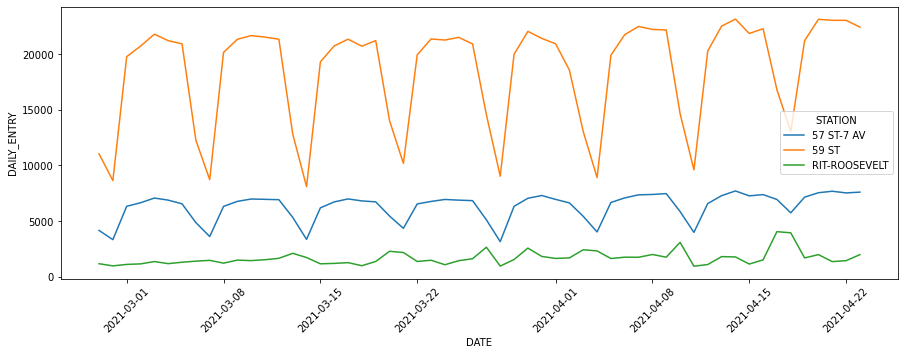

In [253]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.lineplot(data =df1,x='DATE',y='DAILY_ENTRY',hue= 'STATION')

In [254]:
# Station traffics are very different, only apply to statsions with significant traffic e.g. mean or median
df_daily.groupby('STATION')[['DAILY_ENTRY']].mean()


,DAILY_ENTRY
STATION,
1 AV,40644.053571
103 ST,9177.250000
103 ST-CORONA,9279.339286
104 ST,1676.803571
110 ST,3654.000000
...,...
WOODLAWN,2765.196429
WORLD TRADE CTR,2067.089286
WTC-CORTLANDT,1737.250000


In [258]:
df_daily.groupby('STATION')[['DAILY_ENTRY']].median().sort_values('DAILY_ENTRY', ascending = False)

,DAILY_ENTRY
STATION,
34 ST-PENN STA,34094.0
34 ST-HERALD SQ,28052.5
86 ST,27542.5
125 ST,25908.0
GRD CNTRL-42 ST,25731.0
...,...
BEACH 90 ST,255.5
BEACH 98 ST,132.0
BROAD CHANNEL,104.5


In [290]:
# Pick top three stations with largest median daily traffic
#'34 ST-PENN STA'
#'34 ST-HERALD SQ'
#'86 ST'
#'123 ST'

stationmask = ((df_2021['STATION'] == '34 ST-PENN STA')|
               (df_2021['STATION'] == '34 ST-HERALD SQ') |
               (df_2021['STATION'] == '86 ST') | 
               (df_2021['STATION'] == '125 ST') )
df3=df_2021[stationmask]
#df3 #73794
df3.groupby(['STATION'])[['combined']].count().reset_index()


,STATION,combined
0,125 ST,13924
1,34 ST-HERALD SQ,18182
2,34 ST-PENN STA,34016
3,86 ST,21596


In [304]:
df_byturn=df3.groupby(['combined'])[['TIME_ENTRY_TREATED']].sum().sort_values('TIME_ENTRY_TREATED',ascending = False).reset_index().head(50)
df_byturn

,combined,TIME_ENTRY_TREATED
0,N071|R013|00-00-01|34 ST-PENN STA,1819762.0
1,N071|R013|00-06-00|34 ST-PENN STA,852356.0
2,N506|R022|00-05-00|34 ST-HERALD SQ,759522.0
3,C025|R215|00-05-00|86 ST,524196.0
4,N071|R013|00-00-00|34 ST-PENN STA,497857.0
5,N067|R012|00-06-00|34 ST-PENN STA,393616.0
6,R258|R132|00-00-00|125 ST,325498.0
7,N026|R102|00-05-01|125 ST,262140.0
8,R249|R179|01-05-00|86 ST,262025.0
9,N507|R023|00-00-03|34 ST-HERALD SQ,196397.0


<AxesSubplot:xlabel='combined', ylabel='TIME_ENTRY_TREATED'>

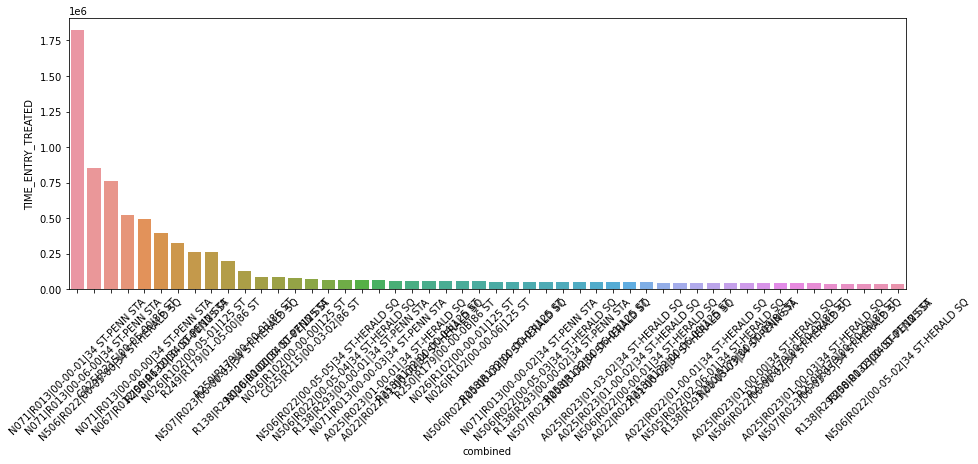

In [305]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x=df_byturn['combined'],y=df_byturn['TIME_ENTRY_TREATED'],data=df_byturn)

TypeError: unhashable type: 'dict_keys'